# Chapter 03 회귀 알고리즘과 모델 규제

## 03-3 특성 공학과 규제

### 다중 회귀

2절에서는 하나의 특성을 사용하여 선형 회귀 모델을 훈련했다.

여러 개의 특성을 사용한 선형 회귀를 **다중 회귀**라고 한다.

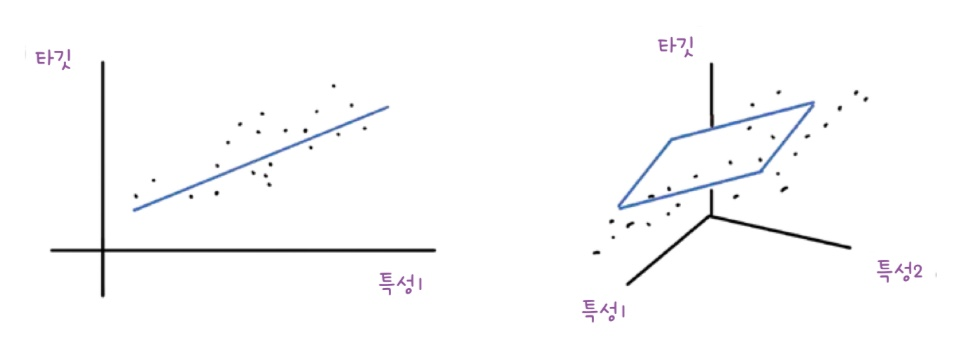

첫 번째 그림 : 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이다.

두 번째 그림 : 2개의 특성을 사용하면 평면을 학습한다.

두 번째 그림처럼 특성이 2개면 타깃값과 함께 3차원 공간을 형성하고 선형 회귀 방정식 '타깃 = a x 특성1 + b x 특성2 + 절편'은 평면이 된다.

특성이 3개인 경우는? -> 우리는 3차원 공간 이상을 그리거나 상상할 수 없다.

이제 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용하자.

각 특성을 서로 곱해서 또 다른 특성을 만들자. '농어 길이 x 농어 높이' -> 새로운 특성.

기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학**이라고 한다.

### 데이터 준비

**판다스**를 사용해 데이터를 **데이터프레임**에 저장한다.

그다음 넘파이 배열로 변환하여 선형 회귀 모델을 훈련한다.

판다스 데이터프레임을 만들기 위해 CSV 파일을 사용하자.

    read_csv() 에 주소 넣기 -> to_numpy() 로 넘파이 배열로 바꾸기

In [1]:
import pandas as pd # pd는 관례적으로 사용하는 판다스의 별칭입니다
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array(
    [   5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )

In [3]:
## perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눈다.

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42)

### 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 클래스인 **변환기**를 제공한다.

In [4]:
## PolynomiaFeatures 클래스는 변환기

from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(include_bias=False) ## include_bais=False는 안써줘도 자동으로 절편항 무시함
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [11]:
## 위 방식으로 train_input에 적용

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) ## 배열의 크기

(42, 9)


In [12]:
## 9개의 특성이 어떤 입력의 조합인지 확인

poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [13]:
## 테스트 세트 변환

test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

## train 세트 점수 0.99

0.9903183436982126


In [17]:
print(lr.score(test_poly, test_target))

## test 세츠 점수 0.97
## 과소적합 문제 해결

0.9714559911594185


In [18]:
## 특성을 더 많이 추가하면?

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [19]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999990035


In [20]:
print(lr.score(test_poly, test_target))

-144.40541545805388


큰 음수가 나타났다.

특성의 개수를 크게 늘리면 선형 모델은 더욱 강력해진다.

훈련 세트에 대해 거의 완벽하게 학습할 수 있다.

하지만 훈련 세트에 너무 과대적합되므로, 테스트 세트에서는 점수가 좋지 않다.

    => 특성을 다시 줄이자.

### 규제

**규제** : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

즉, 모델이 훈련 세트에 과대적합되지 않도록 만든다.

선형 회귀 모델의 경우 특성이 곱해지는 계수(또는 기울기)의 크기를 작게 만든다.

선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다.

따라서 규제를 적용하기 전 **정규화**를 한다.

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## StandardScaler 클래스의 객체 ss 초기화
ss.fit(train_poly) ## train_poly를 사용해 객체 훈련
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 표준 점수로 변환한 train_scaled와 test_scaled

선형 회귀 모델에 규제를 추가한 모델을 **릿지(ridge)**와 **라쏘(lasso)**라 한다.

릿지 : 계수를 제곱한 값을 기준으로 규제를 적용

라쏘 : 계수의 절댓값을 기준으로 규제를 적용

일반적으로 릿지를 더 선호한다.

두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 0으로 만들수도 있다.

### 릿지 회귀

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [25]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


많은 특성을 사용했음에도 불구하고 과대적합되지 않았다.

릿지와 라쏘 모델을 사용할 때, alpha 매개변수로 규제의 강도를 조절할 수 있다.

alpha 값이 크면 규제 강도가 세진다.

적절한 alpha 값을 찾는 방법은 R^2 값의 그래프를 그려보는 것이다.

훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [26]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련하고, 리스트에 저장한다.

In [37]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려보자.

alpha 값을 0.001부터 10배씩 늘렸기 때문에 로그 함수로 바꾸어 지수로 표현하자.

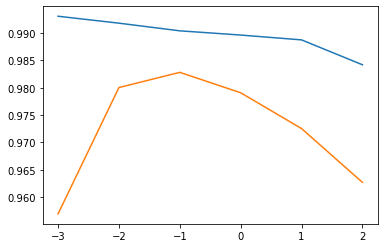

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

위는 훈련 세트 그래프, 아래는 테스트 세트 그래프이다.

왼쪽을 보면 차이가 매우 크다. 이는 과대적합의 전형적인 모습니다.

반대로 오른족은 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합을 보인다.

적절한 alpha 값은 **두 그래프가 가장 가깝고, 테스트 세트 점수가 가장 높은** -1, 즉 10^-1=0.1이다.

alpha 값을 0.1로 하여 최종 모델을 훈련하자.

In [31]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

## 두 점수가 비슷하게 모두 높다.

0.9903815817570366
0.9827976465386906


### 라쏘 회귀

In [33]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9897898972080961


In [34]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [38]:
## alpha 값을 바꾸어가며 훈련

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\adore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957795222, tolerance: 518.2793833333334
  positive)
C:\Users\adore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345403758, tolerance: 518.2793833333334
  positive)


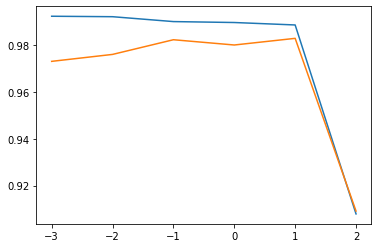

In [39]:
## train_score와 test_score 리스트를 사용해 그래프 그리기

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

이 그래프도 왼쪽은 과대적합, 오른족은 과소적합이다.

라쏘 모델에서 최적의 alpha 값은 1, 즉 10^1=10이다.

In [40]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


릿지와 마찬가지로 라쏘 모델도 과대적합을 잘 억제하고, 테스트 세트의 성능을 높엿다.

앞서 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다고 했었다.

라쏘 모델의 계수는 coef_ 속성에 저장되어 있다.

In [43]:
print(np.sum(lasso.coef_ == 0)) ## 0인 계수가 40개

40


총 55개의 특성 중 라쏘 모델이 사용한 특성은 15개인 것을 알 수 있다.

### 모델의 과대적합을 제어하기

선형 회귀 알고리즘을 사용해 농어의 무게 예측 모델 훈련

-> but, 훈련 세트에 과소적합 문제 발생
    
-> 따라서 농어의 길이 뿐만 아니라 높이와 두꼐도 사용하여 다중 회귀 모델 훈련
        
또한 다항 특성을 많이 추가하여 훈련 세트에서 거의 완벽에 가까운 점수를 얻었다.

특성을 많이 추가 -> 매우 강력한 성능을 내는 선형 회귀

-> but, 특성이 많으면 선형 회귀 모델을 제약하기 위한 도구 필요

따라서 릿지 회귀와 라쏘 회귀 사용

-> 규제 양을 조절하기 위한 최적의 alpha 값 찾는 방법을 알아보았다.